<a href="https://colab.research.google.com/github/amina01/Learning-Neural-Activations/blob/master/mnist_actlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 938/938 [00:14<00:00, 64.25it/s]


Train Epoch: 1 	Loss: 0.149232



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0665, Accuracy: 9807/10000 (98%)



100%|██████████| 938/938 [00:14<00:00, 65.58it/s]


Train Epoch: 2 	Loss: 0.162966



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9837/10000 (98%)



100%|██████████| 938/938 [00:14<00:00, 64.47it/s]


Train Epoch: 3 	Loss: 0.030709



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0434, Accuracy: 9850/10000 (98%)



100%|██████████| 938/938 [00:14<00:00, 65.13it/s]


Train Epoch: 4 	Loss: 0.104085



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0386, Accuracy: 9874/10000 (99%)



100%|██████████| 938/938 [00:14<00:00, 63.11it/s]


Train Epoch: 5 	Loss: 0.005048



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9883/10000 (99%)



100%|██████████| 938/938 [00:14<00:00, 65.02it/s]


Train Epoch: 6 	Loss: 0.060584



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9887/10000 (99%)



100%|██████████| 938/938 [00:14<00:00, 64.29it/s]


Train Epoch: 7 	Loss: 0.018269



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9890/10000 (99%)



100%|██████████| 938/938 [00:14<00:00, 64.68it/s]


Train Epoch: 8 	Loss: 0.000359



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 9891/10000 (99%)



100%|██████████| 938/938 [00:14<00:00, 64.60it/s]


Train Epoch: 9 	Loss: 0.006662



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9892/10000 (99%)



100%|██████████| 938/938 [00:14<00:00, 64.22it/s]


Train Epoch: 10 	Loss: 0.006970



Test set: Average loss: 0.0313, Accuracy: 9891/10000 (99%)



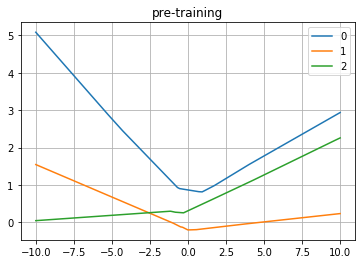

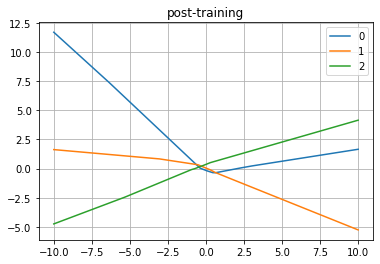

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 24 11:15:36 2019

@author: fayya
"""

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

class AF(nn.Module):
    def __init__(self):
        super(AF, self).__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 1)
    def forward(self, x):       
        z = x.shape
        x = x.flatten().unsqueeze(1)
        
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        
        return x.view(z)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.act0 = AF()#torch.tanh#
        self.act1 = AF()#torch.relu#
        self.act2 = AF()#.to(device)#torch.relu#
        
        # for param in self.act1.parameters():
        #     param.requires_grad = False
        # for param in self.act2.parameters():
        #     param.requires_grad = False
            
    def forward(self, x):
        x = self.conv1(x)
        #import pdb; pdb.set_trace()
        x = self.act0(x)        
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        
        x = self.act1(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        
        x = self.act2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for (data, target) in tqdm(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()        
    print('\nTrain Epoch: {} \tLoss: {:.6f}'.format(epoch,  loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



if __name__ == '__main__':
    # Training settings
    
    batch_size = 64
    epochs = 10
    gamma = 0.7
    log_interval = 10
    lr = 1.0
    no_cuda = False
    save_model = False
    seed = 10.0
    test_batch_size = 1000
    
    use_cuda = not no_cuda and torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    model = Net().to(device)
    import matplotlib.pyplot as plt
    plt.figure();z = torch.linspace(-10,10,1000).to(device); zcpu = z.cpu();
    plt.plot(zcpu,model.act0(z.unsqueeze(-1)).detach().cpu().numpy());
    plt.plot(zcpu,model.act1(z.unsqueeze(-1)).detach().cpu().numpy());
    plt.plot(zcpu,model.act2(z.unsqueeze(-1)).detach().cpu().numpy())
    plt.grid();plt.title("pre-training");plt.legend(['0','1','2'])
    
    optimizer = optim.Adadelta(model.parameters(), lr=lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    if save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")

    plt.figure();z = torch.linspace(-10,10,1000).to(device); zcpu = z.cpu();
    plt.plot(zcpu,model.act0(z.unsqueeze(-1)).detach().cpu().numpy());
    plt.plot(zcpu,model.act1(z.unsqueeze(-1)).detach().cpu().numpy());
    plt.plot(zcpu,model.act2(z.unsqueeze(-1)).detach().cpu().numpy())
    plt.grid();plt.title("post-training");plt.legend(['0','1','2'])